In [58]:
import pandas as pd

In [59]:
import matplotlib.pyplot as plt

In [60]:
import seaborn as sns

In [61]:
from sklearn.datasets import fetch_california_housing

In [62]:
from sklearn.datasets import load_iris

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.neural_network import MLPRegressor 

In [66]:
from sklearn.neural_network import MLPClassifier 

In [67]:
data = fetch_california_housing()
x = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = data.target_names)

In [68]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [69]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [70]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [71]:
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [72]:
y.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [73]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [74]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


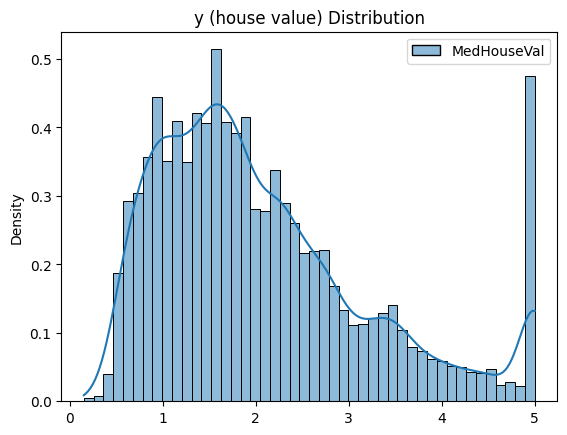

In [130]:
sns.histplot(y, stat = 'density', kde=True)
plt.title("y (house value) Distribution")
plt.show()

In [76]:
#For the most part, values for homes were in in the 100-200s range.
#The max was in the 500s.
#Home values rised and then declined then there was a sharp increase.

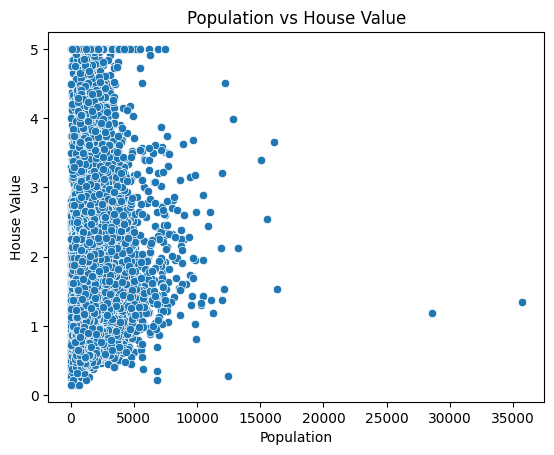

In [77]:
sns.scatterplot(x = x['Population'], y=y['MedHouseVal'])
plt.xlabel('Population')
plt.ylabel('House Value')
plt.title('Population vs House Value')
plt.show()

In [ ]:
#Population doesn't have a strong corellation as it seems.
#There were only 2 instance of population over 17.5k where value was in the 100-200s range.

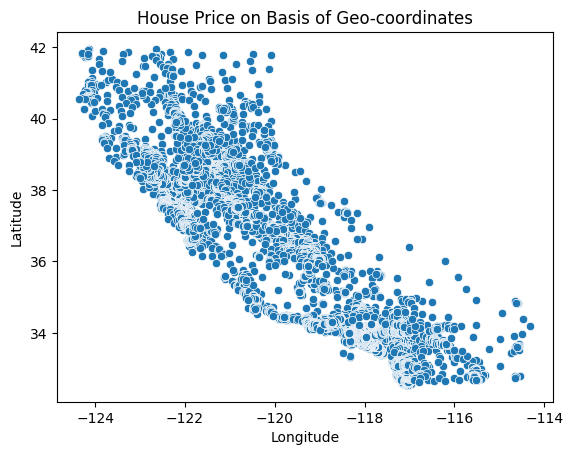

In [78]:
sns.scatterplot(x = x['Longitude'], y = x['Latitude'])
plt.title('House Price on Basis of Geo-coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
#Its shown that most of the homes are located in the Southeast and Northwest part of Cali based on the coordinates.

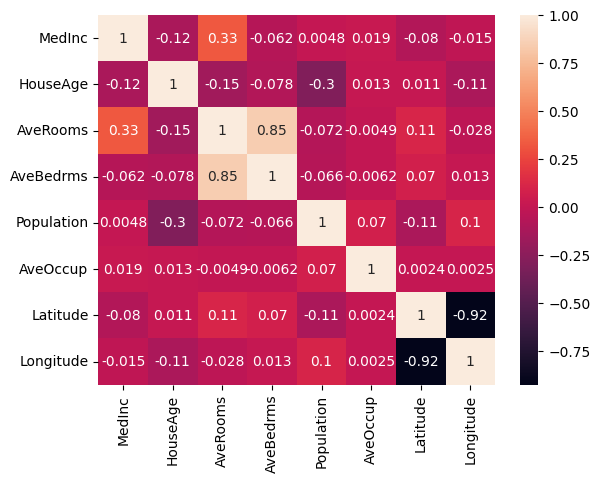

In [79]:
sns.heatmap(x.corr(),annot=True)
plt.show()

In [ ]:
#There seems to be a strong significant corellation with bedrooms and the value of the house.
#More bedrooms lead to a higher home value.

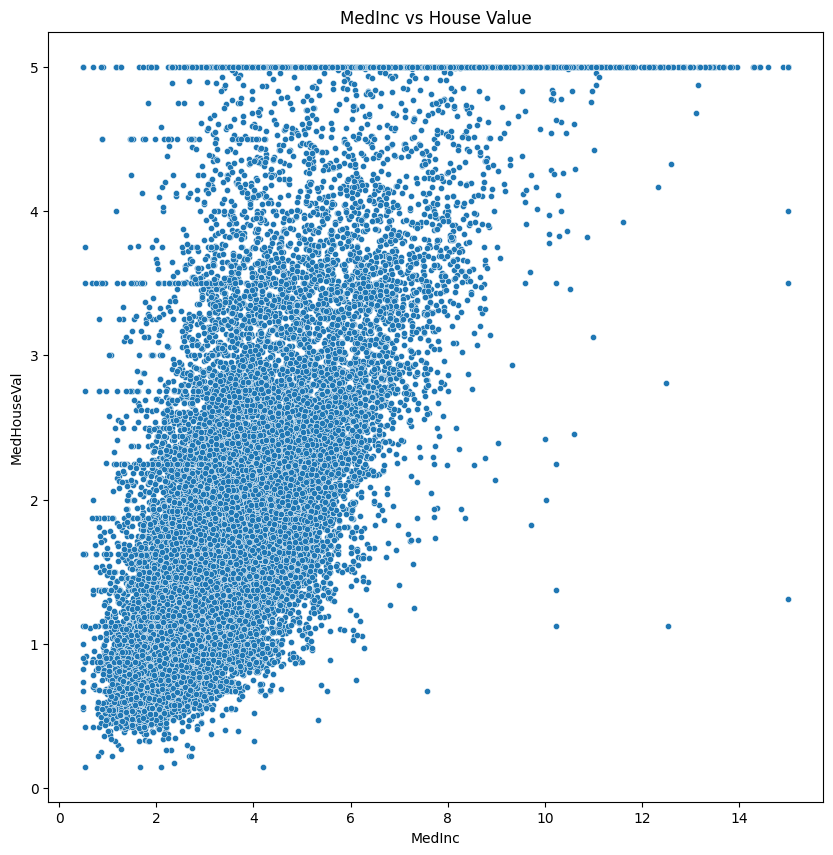

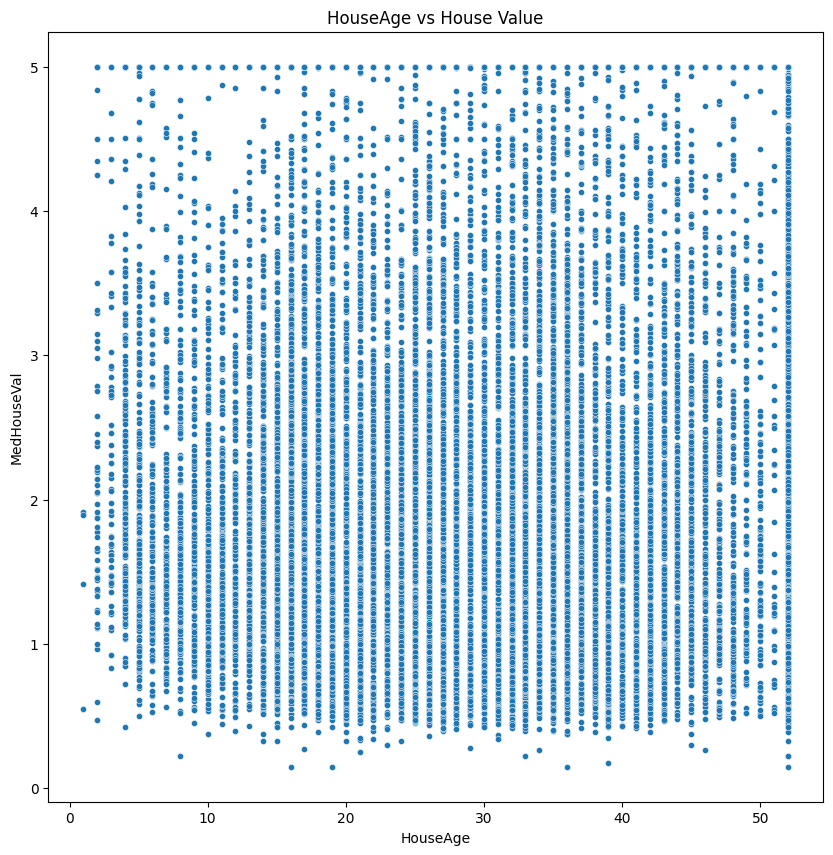

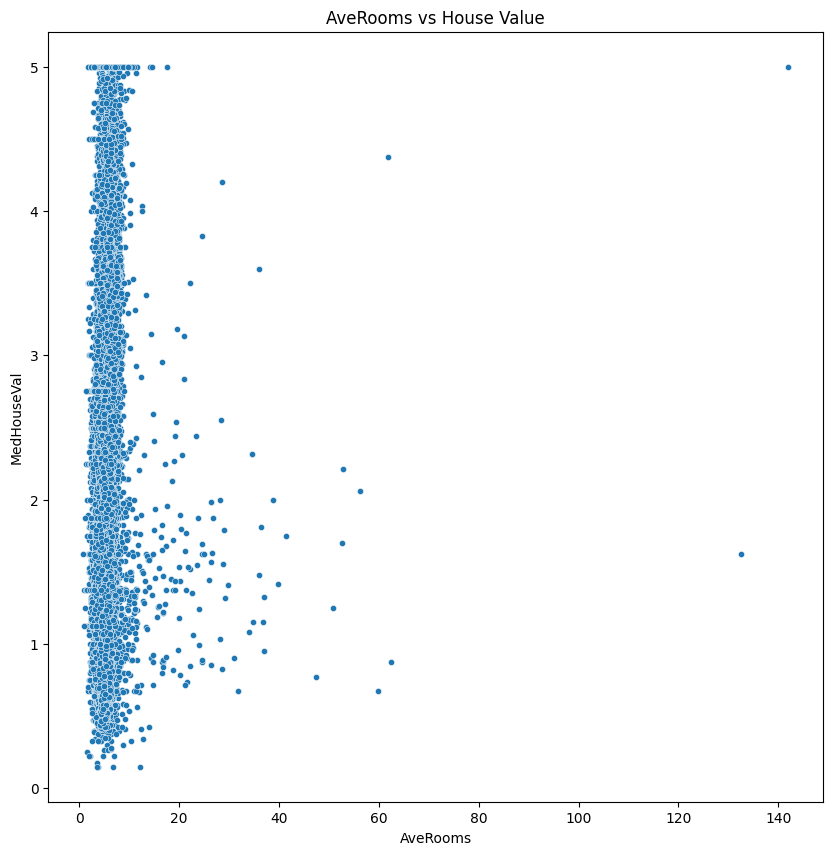

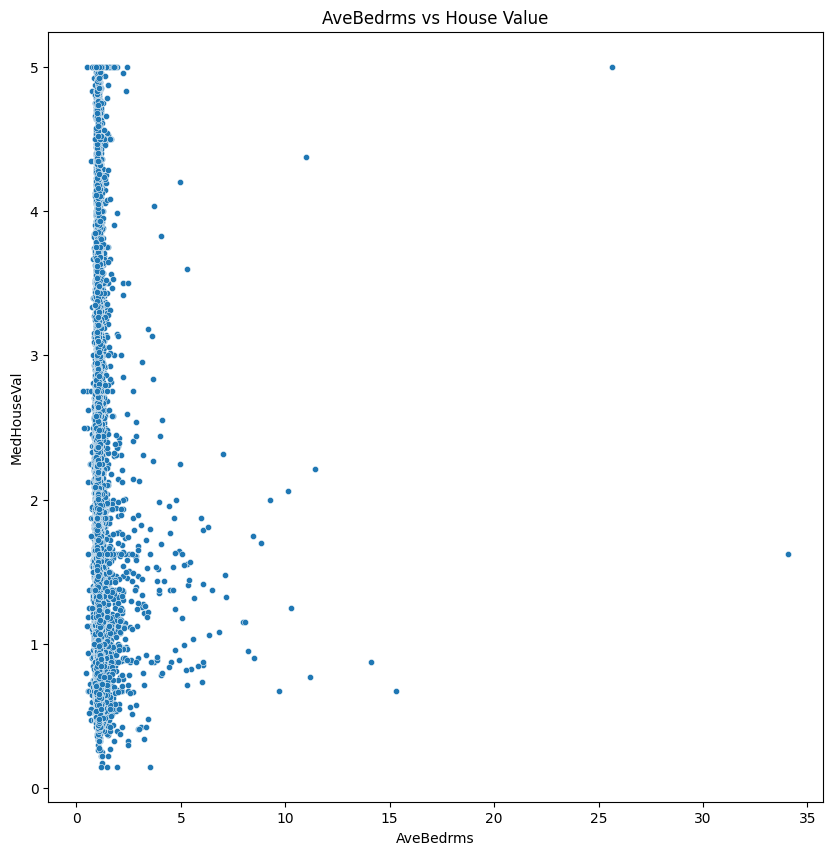

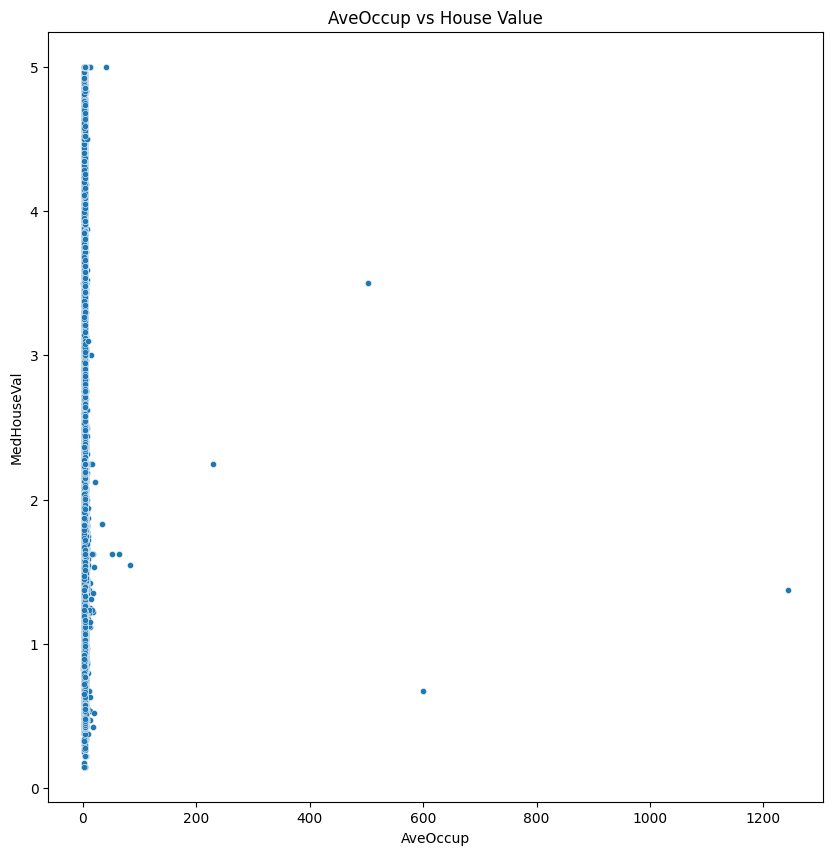

In [80]:
features = ['MedInc', 'HouseAge','AveRooms','AveBedrms','AveOccup']

for feature in features:
    plt.figure(figsize=(10,10))
    sns.scatterplot(data = x, x = feature, y = y['MedHouseVal'], s=20)
    plt.title(f'{feature} vs House Value')
    plt.show()

In [81]:
#Income plays a big role on the home value.
#If there's higher income, then there's more bedrooms, which then leads to higher home value.

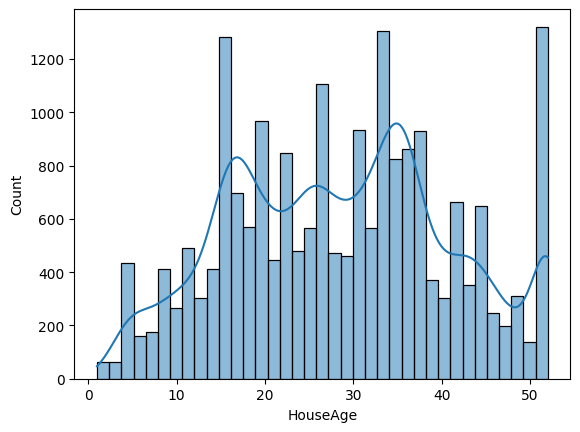

In [82]:
sns.histplot(data = x['HouseAge'],kde=True)
plt.show()

In [83]:
#The age of the house does not really have a big affect on the count as it seems to be scattered.
#The age and count of the house is scattered and has a parabolic relationship. 

In [84]:
scaler = StandardScaler()

In [85]:
x_scaled=x.copy()

In [86]:
scaler.fit(x_scaled)

StandardScaler()

In [87]:
x_scaled=scaler.transform(x_scaled)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [89]:
NeuralNetwork = MLPRegressor(hidden_layer_sizes=(130,63,32,16), activation = 'relu')

In [90]:
NeuralNetwork.fit(x_train,y_train)

C:\Users\Ashmal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashmal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(130, 63, 32, 16))

In [91]:
predictions=NeuralNetwork.predict(x_test)

In [92]:
NeuralNetwork.score(x_test,y_test)

0.7889207826677378

In [93]:
predictions

array([0.49659925, 0.57274641, 5.30200078, ..., 4.72661128, 0.77774112,
       1.81515792], shape=(4128,))

In [ ]:
#The model seems to be good with its scoring as its closer to 1 and greater than 0.7 which is what we typically look for in a good model.

In [97]:
iris = load_iris()

In [99]:
x_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
y_iris = pd.DataFrame(iris.target, columns = ["species"])

In [100]:
x_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [101]:
y_iris.head()

,species
0,0
1,0
2,0
3,0
4,0


In [102]:
x_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [103]:
y_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   species  150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [104]:
x_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [105]:
y_iris.describe()

,species
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [133]:
y_iris.isnull().sum()

species    0
dtype: int64

In [ ]:
#There seems to not be any missing values based on what's presented, which is good.

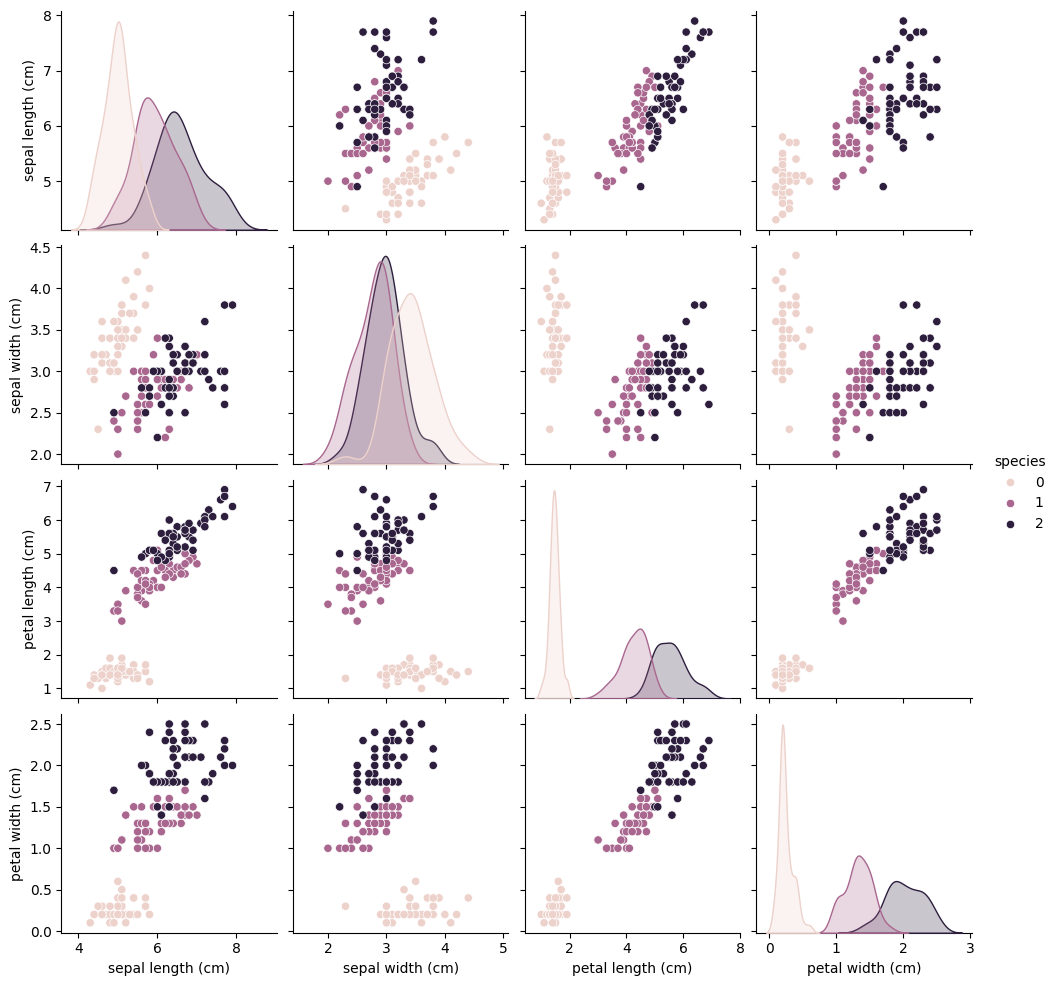

In [108]:
x_iris['species'] = y_iris['species']
sns.pairplot(x_iris, hue="species", diag_kind="kde")

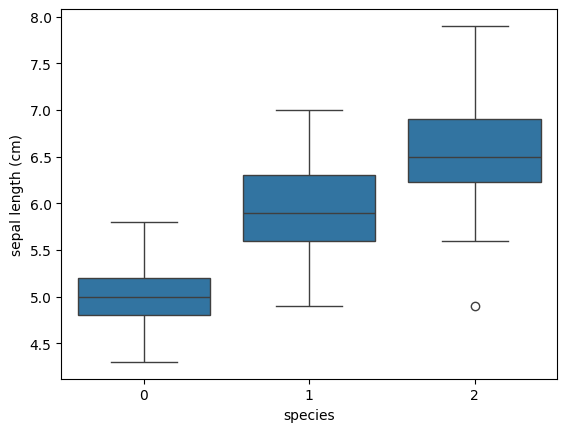

In [109]:
sns.boxplot(x=y_iris['species'], y=x_iris['sepal length (cm)'])
plt.show()

In [110]:
#More species leads to greater the sepal length(cm)

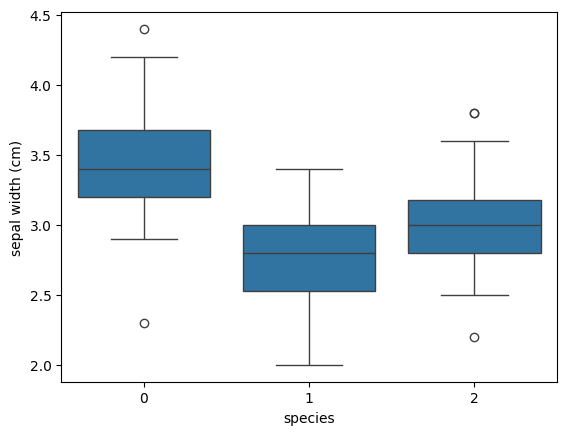

In [111]:
sns.boxplot(x=y_iris['species'], y=x_iris['sepal width (cm)'])
plt.show()

In [ ]:
#There's a decreasing parabolic relation where 1 specie lowers the sepal width(cm) and then 2 specie increase it.

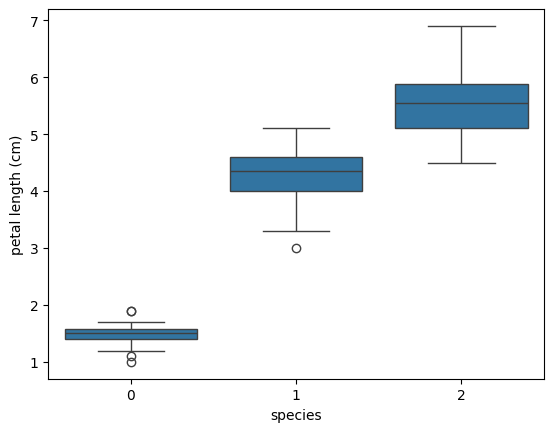

In [112]:
sns.boxplot(x=y_iris['species'], y=x_iris['petal length (cm)'])
plt.show()

In [ ]:
#More species lead to a greater petal length(cm)

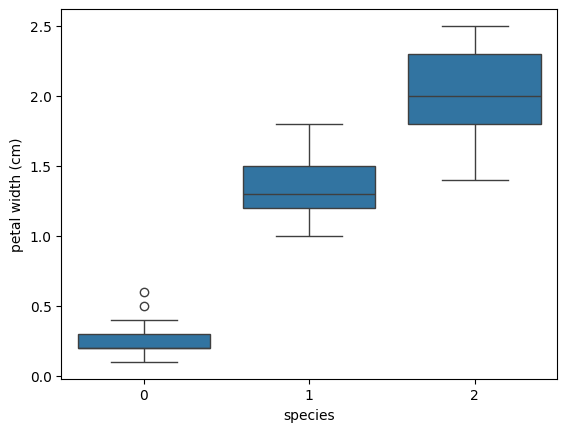

In [113]:
sns.boxplot(x=y_iris['species'], y=x_iris['petal width (cm)'])
plt.show()

In [ ]:
#More species lead to a greater petal width(cm).

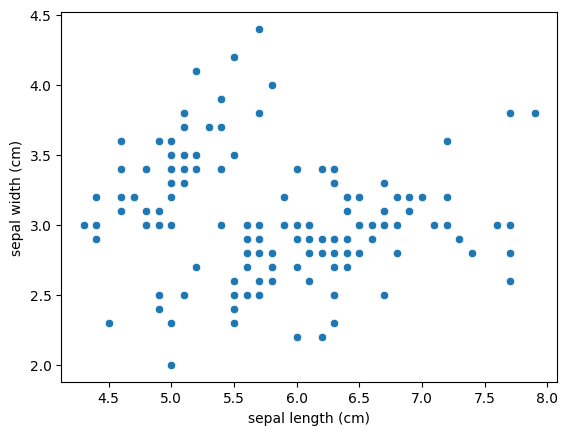

In [114]:
sns.scatterplot(x = x_iris['sepal length (cm)'], y=x_iris['sepal width (cm)'])
plt.show()

In [ ]:
#There seems to be a scattered relation with the sepal length and the sepal width while in the middle is where things tend to stay maintained.

In [115]:
scaler = StandardScaler()

In [116]:
x_copy = x_iris.copy()

In [117]:
x_iris_scaled = scaler.fit_transform(x_copy)

In [119]:
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(x_iris_scaled, y_iris, test_size=0.2, random_state = 42)

In [120]:
clf = MLPClassifier(hidden_layer_sizes=(130,63,32,16), activation = 'relu')

In [121]:
clf.fit(iris_x_train, iris_y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(130, 63, 32, 16))

In [122]:
iris_predictions = clf.predict(iris_x_test)

In [123]:
clf.score(iris_x_test,iris_y_test)

1.0

In [124]:
iris_predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

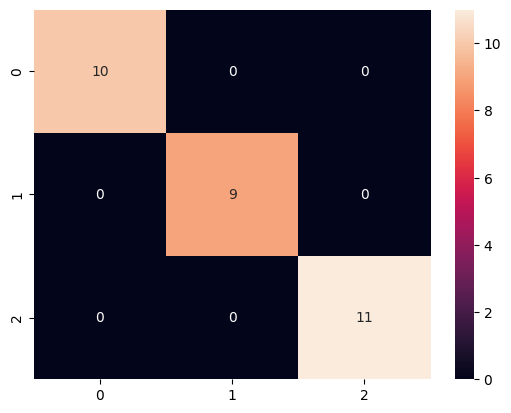

In [132]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(iris_y_test,iris_predictions)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
#Based on what's presented with this model, it seems to be a great model as it yields a score of exactly 1.0 which is excellent.
#This model is great for providing a more accurate predictive outcome. 
#Compared to the other dataset, this model performed better with the iris data.